In [1]:
from simulation.simulator import Simulator

In [2]:
def diffeq_lorenz_system(t, z, args):
    """
    Coupled differential equations representing the Lorenz system.
    """
    sigma, rho, beta = args
    x1, x2, x3 = z
    dx1dt = sigma * (x2 - x1)
    dx2dt = x1 * (rho - x3) - x2
    dx3dt = x1 * x2 - beta * x3
    return [dx1dt, dx2dt, dx3dt]

In [3]:
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

ics = []
for i in range(0, 100):
    x1_0 = 5.0 + 0.001 * i
    x2_0 = 1.0
    x3_0 = 1.0
    ics.append([x1_0, x2_0, x3_0])

In [4]:
scipy_sim = Simulator("jax")

In [6]:
scipy_sim.solve_ics_with_vmap(
    ics, diffeq_lorenz_system, [sigma, rho, beta], 0.0, 100.0, 0.01
)

KeyboardInterrupt: 

In [ ]:
scipy_sim.cpu_sequential_solve_ics(
    ics, diffeq_lorenz_system, [sigma, rho, beta], 0.0, 100.0, 0.01
)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


EquinoxRuntimeError: Above is the stack outside of JIT. Below is the stack inside of JIT:
  File "/home/fichte/Public_Projects/GitHub/diffeq-bench/venv-diffeqs/lib/python3.10/site-packages/diffrax/_integrate.py", line 1423, in diffeqsolve
    sol = result.error_if(sol, jnp.invert(is_okay(result)))
equinox.EquinoxRuntimeError: The maximum number of solver steps was reached. Try increasing `max_steps`.

-------------------

An error occurred during the runtime of your JAX program.

1) Setting the environment variable `EQX_ON_ERROR=breakpoint` is usually the most useful
way to debug such errors. This can be interacted with using most of the usual commands
for the Python debugger: `u` and `d` to move up and down frames, the name of a variable
to print its value, etc.

2) You may also like to try setting `JAX_DISABLE_JIT=1`. This will mean that you can
(mostly) inspect the state of your program as if it was normal Python.

3) See `https://docs.kidger.site/equinox/api/debug/` for more suggestions.


In [ ]:
scipy_sim.cpu_parallel_solve_ics(
    ics=ics,
    num_processes=10,
    diffeq_func=diffeq_lorenz_system,
    args=[sigma, rho, beta],
    ti=0.0,
    tf=100.0,
    dt=0.01,
)

MaybeEncodingError: Error sending result: '<multiprocessing.pool.ExceptionWithTraceback object at 0x757173954190>'. Reason: 'PicklingError("Can't pickle <class 'EquinoxRuntimeError'>: attribute lookup EquinoxRuntimeError on builtins failed")'

cpu_serial_solve_ics(ics, scipy_sim, diffeq_lorenz_system, [])

<module 'matplotlib.pyplot' from '/home/fichte/Public_Projects/GitHub/diffeq-bench/venv-diffeqs/lib/python3.10/site-packages/matplotlib/pyplot.py'>

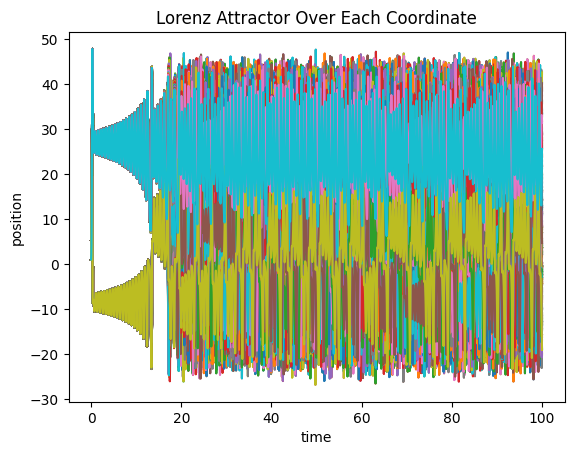

In [ ]:
scipy_sim.plot_numeric_sol_ivp(
    label_x="time", label_y="position", title="Lorenz Attractor Over Each Coordinate"
)